<a href="https://colab.research.google.com/github/descandon88/math-for-machine-learning/blob/main/Eigenvectors_and_Eigenvalues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

**Eigenvectors and Eigenvalues**

An **eigenvector** is a special vector 𝓥 such that when it is transformed by some matrix (let's say *A*), the product *A*𝓥 has the exact same direction as 𝓥.

An **eigenvalue** is a scalar (tradicional represented as 𝝀) that simply scales the eigenvector 𝓥 such that the following equation is satisfied: 

*A*𝓥 = 𝝀𝓥



In [2]:
A = ([-1,4],[2,-2])
A

([-1, 4], [2, -2])

**Eigenvector** and **eigenvalues** can be derived algebraically (e.g., with QR algorithm, which was independently developed in the 1950s by both Vera Kublanovskaya and John Francis), however this is outside scope of today's class. We-ll cheat with numpy eig() method, which returns a tuple of: 

> a vector of eigenvalues

> a matrix of eigenvectors





In [3]:
lambdas, V = np.linalg.eig(A)

The matrix contains as many eigenvectors as there are columns of A: 

In [4]:
V # cada columna es un eigenvector v separado

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [5]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that  *A*𝓥 = 𝝀𝓥 for the  first eigenvector:


In [6]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [7]:
lambduh = lambdas[0] # note that lambda is reserved term in Python 
lambduh

1.3722813232690143

In [8]:
Av= np.dot(A,v)
Av

array([1.18031462, 0.70000958])

In [9]:
lambduh * v

array([1.18031462, 0.70000958])

Plot one or more vectors in a 2D plane, specifying a color for each. 


In [17]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

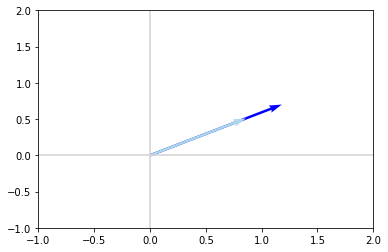

In [18]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
_= plt.ylim(-1,2)


And again for the second eigenvector of A:

In [12]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [13]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [14]:
Av2 = np.dot(A,v2)
Av2

array([ 3.34281692, -2.81822977])

In [15]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

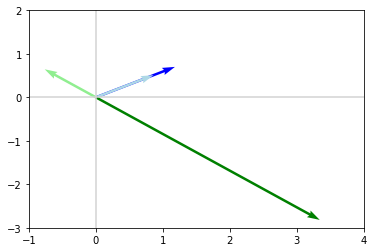

In [20]:
plot_vectors([Av,v,Av2,v2],['blue','lightblue','green','lightgreen'])
plt.xlim(-1,4)
_= plt.ylim(-3,2)


Usando Pytorh

In [21]:
A

([-1, 4], [2, -2])

In [25]:
A_p = torch.tensor([[-1, 4], [2, -2.]])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [26]:
#en pytorch los eigenvectors y eigenvalues no salen automaticamente al aplical la funcion eig()
eigens = torch.eig(A_p,eigenvectors=True)
eigens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:3415.)
  """Entry point for launching an IPython kernel.


torch.return_types.eig(
eigenvalues=tensor([[ 1.3723,  0.0000],
        [-4.3723,  0.0000]]),
eigenvectors=tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]]))

In [28]:
v_p=eigens.eigenvectors[:,0]
v_p

tensor([0.8601, 0.5101])

In [32]:
lambda_p=eigens.eigenvalues[0][0]
lambda_p

tensor(1.3723)

In [34]:
Av_p = torch.matmul(A_p,v_p)
Av_p

tensor([1.1803, 0.7000])

In [35]:
lambda_p * v_p

tensor([1.1803, 0.7000])